In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
pd.set_option("display.max_columns",999)
import numpy as np
import json


# Getting some info from JSON file

In [2]:
df = pd.read_pickle("../pickles/cuentalo_json_con_pais_ciudad_limpios.pkl")


## Timeline del hashtag -- como se disparó?

In [4]:
df.columns

Index(['country', 'created_at', 'favorite_count', 'full_text', 'id', 'lat',
       'location', 'lon', 'parent_country', 'parent_created_at',
       'parent_favorite_count', 'parent_full_text', 'parent_id', 'parent_lat',
       'parent_location', 'parent_lon', 'parent_place', 'parent_quote_count',
       'parent_retweet_count', 'parent_time_zone', 'parent_user_created_at',
       'parent_user_followers_count', 'parent_user_id', 'parent_user_name',
       'parent_user_screen_name', 'parent_user_statuses_count', 'place',
       'quote_count', 'retweet_count', 'time_zone', 'tweet_type',
       'user_created_at', 'user_followers_count', 'user_id', 'user_name',
       'user_screen_name', 'user_statuses_count', 'ciudad_clean', 'pais_clean',
       'location_diagnosis', 'parent_ciudad_clean', 'parent_pais_clean',
       'parent_location_diagnosis'],
      dtype='object')

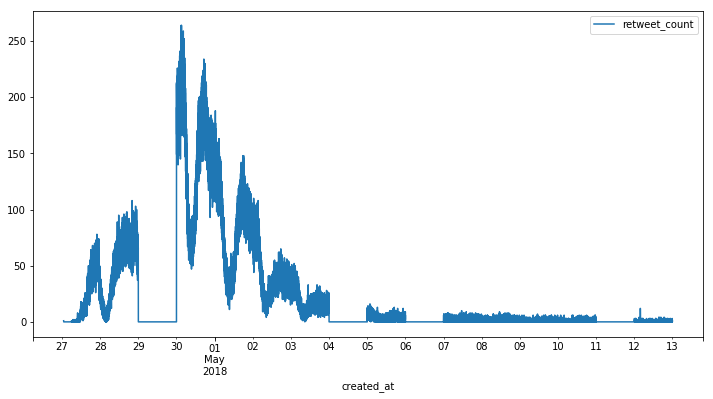

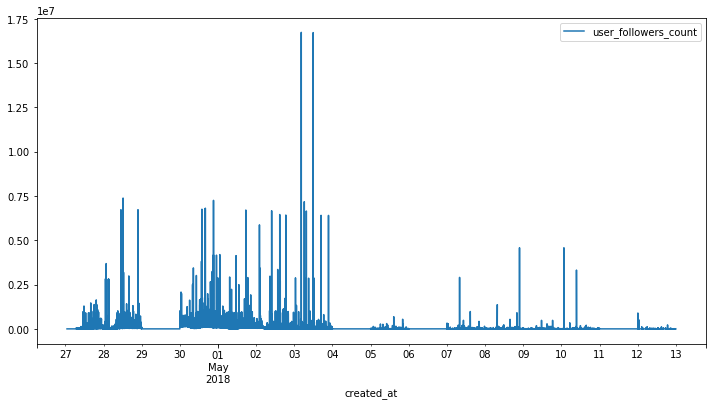

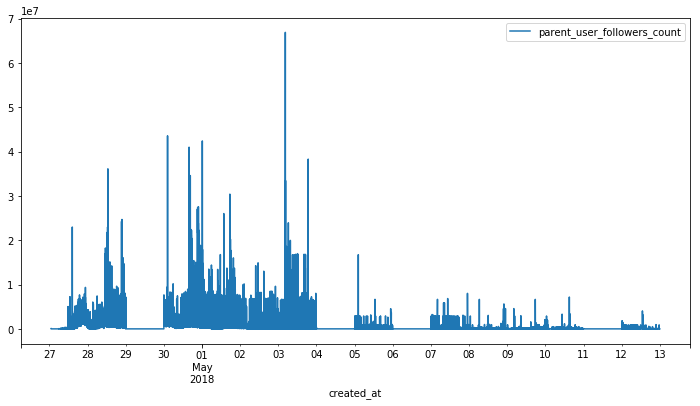

In [5]:
# RTs by influencers...? Quien disparó el cuentalo?
df[['created_at','retweet_count']].set_index('created_at').resample('15S').count().plot(figsize=(12,6))
df[['created_at','user_followers_count']].set_index('created_at').resample('15S').sum().plot(figsize=(12,6))
df[['created_at','parent_user_followers_count']].set_index('created_at').resample('15S').sum().plot(figsize=(12,6))


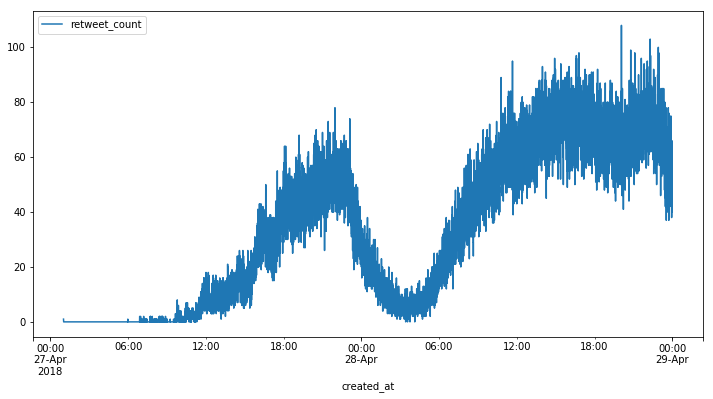

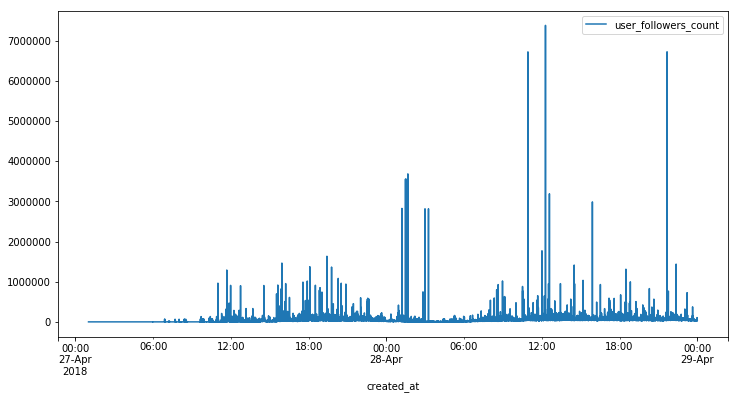

In [7]:
import datetime
df[['created_at','retweet_count']][df['created_at']< datetime.datetime(2018,4,29)].set_index('created_at').resample('15S').count().plot(figsize=(12,6))
df[['created_at','user_followers_count']][df['created_at']< datetime.datetime(2018,4,29)].set_index('created_at').resample('15S').sum().plot(figsize=(12,6))


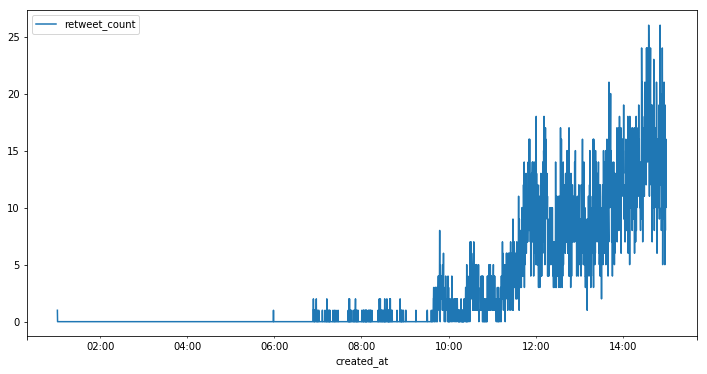

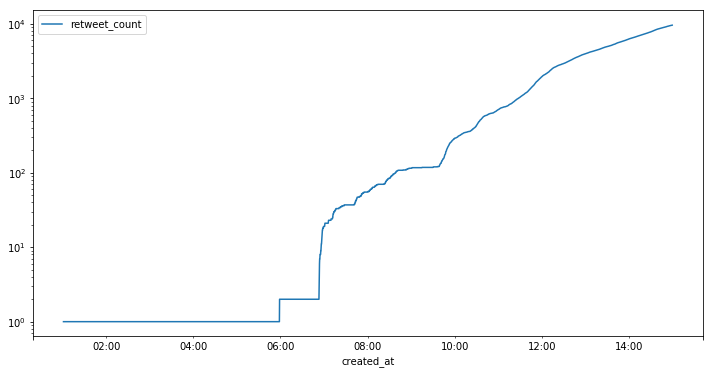

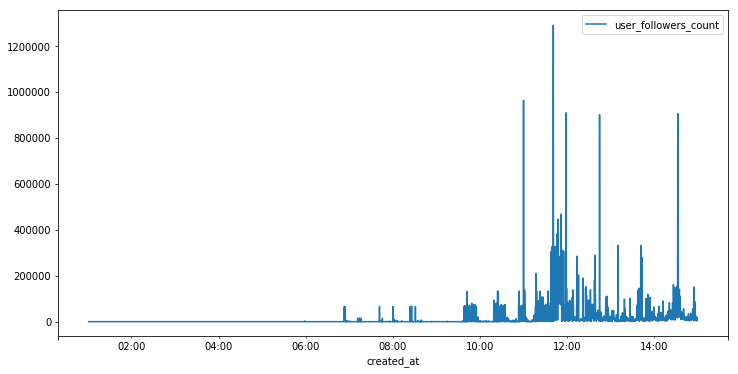

In [65]:
df[['created_at','retweet_count']][df['created_at']< datetime.datetime(2018,4,27,15,0,0)].set_index('created_at').resample('15S').count().plot(figsize=(12,6))
df[['created_at','retweet_count']][df['created_at']< datetime.datetime(2018,4,27,15,0,0)].set_index('created_at').resample('15S').count().cumsum().plot(figsize=(12,6)).set_yscale("log")
df[['created_at','user_followers_count']][df['created_at']< datetime.datetime(2018,4,27,15,0,0)].set_index('created_at').resample('15S').sum().plot(figsize=(12,6))


In [8]:
# los tweets que viralizaron #cuentalo?
# primera ola, 7 de la mañana
df[(df['created_at']< datetime.datetime(2018,4,27,7,0,0)) & (df['user_followers_count']>10000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
tweet_id,,,
989759705344950273,2018-04-27 06:54:37,LaFallaras,66090
989759402767859712,2018-04-27 06:53:25,LaFallaras,66090


In [10]:
# los tweets que viralizaron #cuentalo?
# segunda ola, 10 de la mañana
df[(df['created_at']>= datetime.datetime(2018,4,27,7,0,0)) & (df['created_at']< datetime.datetime(2018,4,27,10,0,0)) & (df['user_followers_count']>10000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
tweet_id,,,
989764018779840518,2018-04-27 07:11:45,manubenas,14548
989764518556319744,2018-04-27 07:13:44,manubenas,14548
989764817631174656,2018-04-27 07:14:56,manubenas,14548
989765213242052608,2018-04-27 07:16:30,manubenas,14548
989772601244319744,2018-04-27 07:45:51,manubenas,14548
989764409403756544,2018-04-27 07:13:18,manubenas,14548
989805732995485696,2018-04-27 09:57:31,kolontai1959,20577
989802741345275904,2018-04-27 09:45:37,LaFallaras,66090
989805188335759360,2018-04-27 09:55:21,LaFallaras,66090


In [68]:
# los tweets que viralizaron #cuentalo?
# tercera ola, 11:30 de la mañana
df[(df['created_at']< datetime.datetime(2018,4,27,11,30,0)) & (df['user_followers_count']>100000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
989821531864911873,2018-04-27 11:00:17,publico_es,898092


In [69]:
# los tweets que viralizaron #cuentalo?
# 4ta ola, 12:30 de la mañana
df[(df['created_at']>= datetime.datetime(2018,4,27,11,30,0)) & (df['created_at']< datetime.datetime(2018,4,27,12,30,0)) & (df['user_followers_count']>100000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
989843365188562944,2018-04-27 12:27:03,kurioso,105327
989842344055799810,2018-04-27 12:22:59,JosePerLo,141405
989843250096750592,2018-04-27 12:26:35,Solidaridad1000,146345
989842118314164224,2018-04-27 12:22:06,lamarea_com,181573
989835426318946305,2018-04-27 11:55:30,Barbijaputa,300831
989835175969239041,2018-04-27 11:54:30,Barbijaputa,300831
989834674972299264,2018-04-27 11:52:31,Barbijaputa,300831
989834562900496386,2018-04-27 11:52:04,Barbijaputa,300831
989833577050275840,2018-04-27 11:48:09,Barbijaputa,300831
989833055543193600,2018-04-27 11:46:05,Barbijaputa,300831


In [70]:
# los tweets que viralizaron #cuentalo?
# 4ta ola, 15:00 
df[ (df['created_at']>= datetime.datetime(2018,4,27,12,30,0)) & (df['created_at']< datetime.datetime(2018,4,27,15,0,0)) & (df['user_followers_count']>100000)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
989875019722510336,2018-04-27 14:32:50,MotivacionAhora,148066
989875016023138305,2018-04-27 14:32:49,MotivacionAhora,148066
989875011447083009,2018-04-27 14:32:48,MotivacionAhora,148066
989875008209145864,2018-04-27 14:32:47,MotivacionAhora,148066
989875004421607424,2018-04-27 14:32:46,MotivacionAhora,148066
989875000982364160,2018-04-27 14:32:45,MotivacionAhora,148066
989862223022579713,2018-04-27 13:41:59,lamarea_com,181573
989854302708494336,2018-04-27 13:10:31,epigmenioibarra,325243
989847882676174849,2018-04-27 12:45:00,publico_es,898092


In [71]:
###### los tweets que viralizaron #cuentalo?
# 5ta ola, tarde del 27
inid=datetime.datetime(2018,4,27,15,0,0)
endd=datetime.datetime(2018,4,28,0,0,0)
umbral=300000
df[(df['created_at']>= inid) & (df['created_at']< endd) & (df['user_followers_count']>umbral)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
989988177145417733,2018-04-27 22:02:29,comentaconjose,322958
989893157662875648,2018-04-27 15:44:54,MIAREsproject,378904
989979396562878464,2018-04-27 21:27:35,luisbremer,382713
989955994687016960,2018-04-27 19:54:36,pnique,421053
989923484443774977,2018-04-27 17:45:25,lavecinarubia,425957
989924039899705344,2018-04-27 17:47:37,lavecinarubia,425957
989927513462857728,2018-04-27 18:01:25,lavecinarubia,425957
989987832642134016,2018-04-27 22:01:07,MonicaCarrillo,472315
989899792359837696,2018-04-27 16:11:16,MonederoJC,482270
989997641890172928,2018-04-27 22:40:05,srtabebi,531947


In [72]:
###### los tweets que viralizaron #cuentalo?
# 4ta ola, dia 28
inid=datetime.datetime(2018,4,28,0,0,0)
endd=datetime.datetime(2018,4,29,0,0,0)
umbral=500000
df[(df['created_at']>= inid) & (df['created_at']< endd) & (df['user_followers_count']>umbral)][['created_at','user_screen_name','user_followers_count']].sort_values('user_followers_count')

,created_at,user_screen_name,user_followers_count
990329556211982336,2018-04-28 20:39:00,324cat,507442
990193612364410880,2018-04-28 11:38:48,324cat,507465
990139051859759104,2018-04-28 08:02:00,324cat,507481
990277314134110209,2018-04-28 17:11:24,Siliconvalle,531529
990283281039003650,2018-04-28 17:35:07,srtabebi,531826
990178471547633665,2018-04-28 10:38:38,srtabebi,531903
990155410123513856,2018-04-28 09:07:00,srtabebi,531915
990155968897015808,2018-04-28 09:09:13,srtabebi,531915
990202019234316288,2018-04-28 12:12:13,iniciarsesion,579795
990194192705032194,2018-04-28 11:41:07,iniciarsesion,579800


In [34]:
inid=datetime.datetime(2018,4,27,0,0,0)
endd=datetime.datetime(2018,4,29,0,0,0)

df[['created_at','pais_clean']][(df['created_at']>= inid) & (df['created_at']< endd)].set_index('created_at').resample('15min').apply(lambda x: x.unique())



,pais_clean
created_at,
2018-04-27 01:00:00,NaN
2018-04-27 01:15:00,[]
2018-04-27 01:30:00,[]
2018-04-27 01:45:00,[]
2018-04-27 02:00:00,[]
2018-04-27 02:15:00,[]
2018-04-27 02:30:00,[]
2018-04-27 02:45:00,[]
2018-04-27 03:00:00,[]


In [40]:
df['accumulated_followers']

tweet_id
990380137937035265     582321620
990380135638593538     582322214
990380135500181505     582321965
990380134715871233     582321833
990380130362187776     582319781
990380129162616833     582319740
990380128361418752     582318225
990380127992340480     582317731
990380127627415553     582317623
990380126960537600     582317365
990380122485264385     582316810
990380122082611200     582316768
990380119951896577     582315426
990380119155003392     582316429
990380118731345921     582316690
990380113735966720     582315355
990380111697448962     582313932
990380109214441472     582313918
990380107159261184     582313458
990380106693644288     582313151
990380101618544640     582312685
990380100721012736     582311786
990380100167356417     582310913
990380098913275904     582309398
990380098611113984     582309328
990380098451836928     582308962
990380098091192320     582311256
990380097688473600     582311054
990380095230676992     582306338
990380094291095553     582307105
 

In [44]:
df['accumulated_followers'] = df.sort_values(by='created_at').replace(to_replace=-1, value=0).fillna(0).user_followers_count.cumsum()

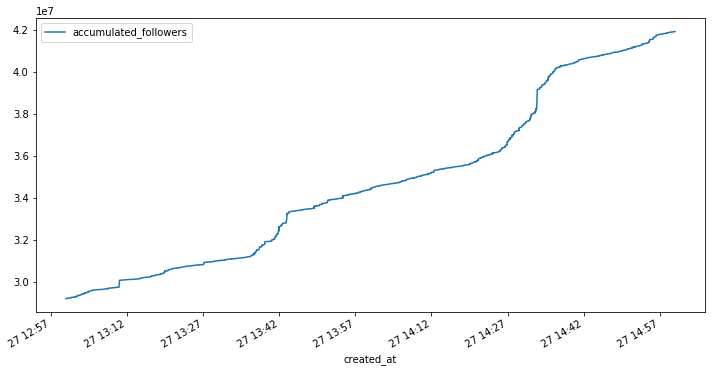

In [56]:
inid=datetime.datetime(2018,4,27,13,0,0)
endd=datetime.datetime(2018,4,27,15,0,0)
df[['created_at','accumulated_followers']][(df['created_at']>= inid) 
 & (df['created_at']< endd)].set_index('created_at').plot(figsize=(12,6))


## Otras ideas
- geolocalizar los tweets sin loc info 
- identificar tweets mas influyentes y retweeteados (mostrarlos con los identificados del timeline)
- Buscar algun modelo de impacto del tweet?
 - https://scholarspace.manoa.hawaii.edu/bitstream/10125/50160/1/paper0273.pdf
- descargar tweets originales que faltan
- encontrar el perfil tipico de usuarias que ponen contenido original
- mirar tratamiento tweets aqui: http://www.nltk.org/howto/twitter.html


# Getting info from text properties

- https://marcobonzanini.com/2015/03/09/mining-twitter-data-with-python-part-2/
- https://dzone.com/articles/applying-nlp-to-tweets-with-python
- https://relopezbriega.github.io/blog/2017/09/23/procesamiento-del-lenguaje-natural-con-python/
- https://pmoracho.github.io/blog/2017/01/04/NLTK-mi-tutorial/
- http://www.clubdetecnologia.net/blog/2017/aplicacion-de-nlp-a-tweets-con-python/